#### Inicializando

In [1]:
!pip install yahooquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 346.1 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import yfinance as yf
import yahooquery as yq

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
def autolabel(rects):
    """Anexa uma etiqueta de texto acima de cada barra mostrando seu valor."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'R${height:,.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos verticais de deslocamento
                    textcoords="offset points",
                    ha='center', va='bottom')

In [5]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

## Índices

Os índices financeiros são ferramentas essenciais no mercado financeiro, utilizados por bancos, investidores, analistas e gestores de portfólios para medir e comparar o desempenho de diferentes segmentos do mercado. Vamos explorar alguns dos principais índices financeiros e como eles são utilizados pelos bancos.

### Principais Índices Financeiros

#### *Índice* Bovespa (Ibovespa)

- Descrição:

O Ibovespa é o principal índice da Bolsa de Valores de São Paulo (B3). Ele reflete o desempenho das ações mais negociadas e mais representativas do mercado de ações brasileiro.

- Utilização:

Bancos utilizam o Ibovespa para avaliar o desempenho do mercado de ações brasileiro, desenvolver produtos financeiros (como fundos indexados ao Ibovespa) e para análises econômicas e financeiras.

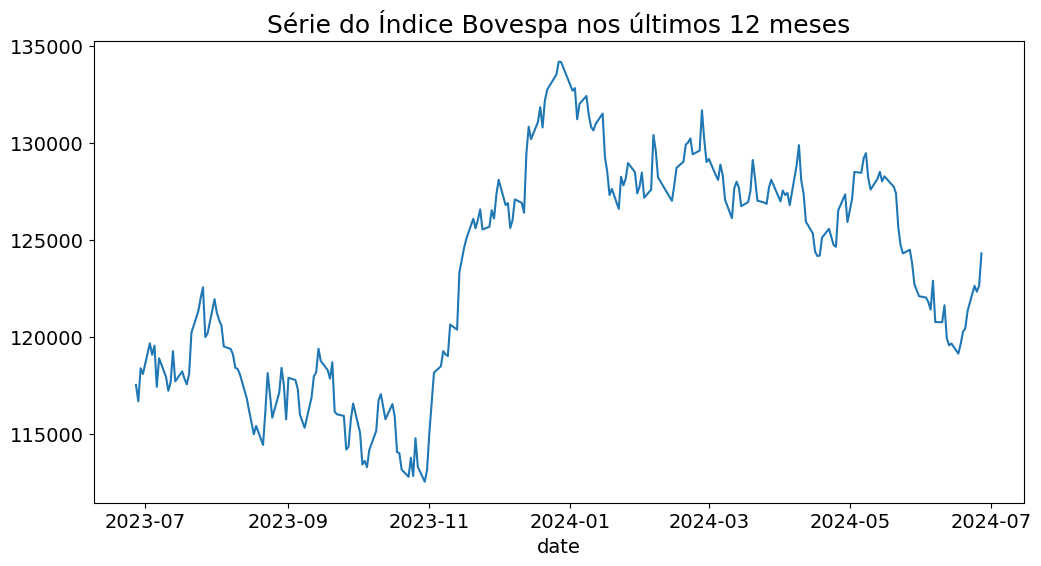

In [6]:
ibov = yq.Ticker('^BVSP')

ibov_serie = ibov.history(period='1y', interval='1d').reset_index()
ibov_serie = ibov_serie.set_axis(pd.to_datetime(ibov_serie.date).dt.date).close

fig, ax = plt.subplots(1,1, figsize=(12,6))

ibov_serie.plot(ax = ax, title="Série do Índice Bovespa nos últimos 12 meses");

#### IPCA (Índice de Preços ao Consumidor Amplo)

- Descrição:

O IPCA é o índice oficial de inflação do Brasil, calculado pelo IBGE (Instituto Brasileiro de Geografia e Estatística). Ele mede a variação de preços de uma cesta de bens e serviços consumidos pelas famílias com renda de 1 a 40 salários mínimos. O IPCA é calculado mensalmente e reflete a variação média dos preços ao consumidor em várias regiões metropolitanas do Brasil.
- Utilização:
  - **Indexação de Produtos Financeiros**: Muitos produtos financeiros, como títulos públicos (exemplo: NTN-Bs), e títulos privados (debêntures e CRIs/CRAs), são indexados ao IPCA. Esses produtos oferecem proteção contra a inflação, pois seus rendimentos são ajustados pelo IPCA.
  - **Crédito e Empréstimos**: Alguns contratos de crédito e financiamentos imobiliários podem ser ajustados pelo IPCA, oferecendo taxas de juros que acompanham a inflação.
  - **Gestão de Risco**: Bancos utilizam o IPCA para gestão de risco, especialmente em produtos de renda fixa e derivativos, ajustando suas carteiras para proteger contra a inflação.
  - **Política de Investimento**: A expectativa de inflação medida pelo IPCA é fundamental para a tomada de decisões de investimento. Bancos e gestores de fundos utilizam previsões de inflação para ajustar suas estratégias de alocação de ativos.
  - **Análise Econômica**: O IPCA é um indicador crucial para a análise econômica, ajudando os bancos a prever tendências de inflação e a adaptar suas políticas de crédito e investimentos de acordo com as condições macroeconômicas.

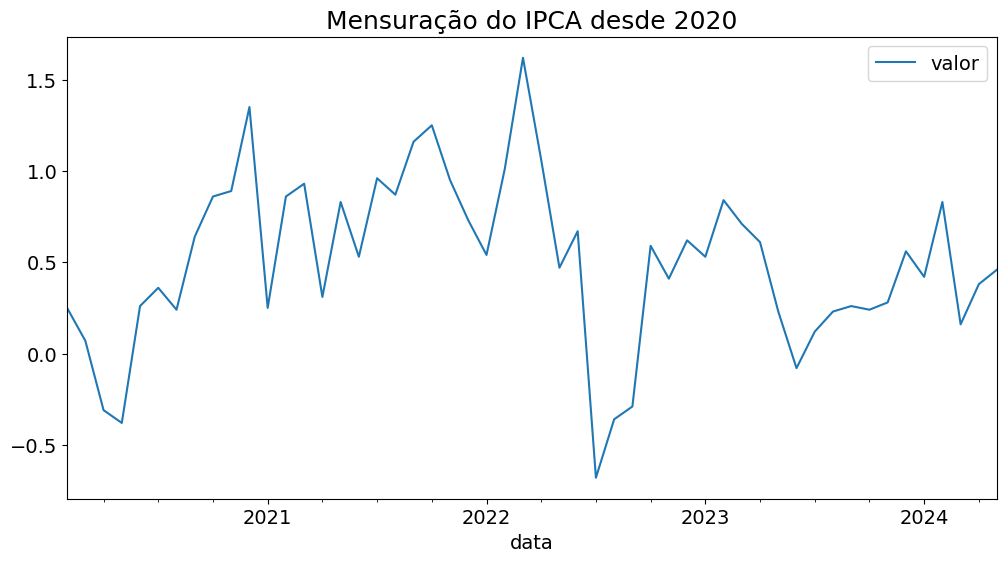

In [7]:
ipca = consulta_bc(433)
ipca = ipca[ipca.index > "2020-01-01"]

fig, ax = plt.subplots(1,1, figsize=(12,6))

ipca.plot(ax = ax, title="Mensuração do IPCA desde 2020");

#### Índice Geral de Preços do Mercado (IGP-M)

- Descrição:

O IGP-M é um índice de inflação utilizado no Brasil. Ele é calculado pela Fundação Getúlio Vargas (FGV) e é amplamente utilizado para ajustar contratos, como aluguéis e tarifas públicas.

- Utilização:

Bancos utilizam o IGP-M para ajustar contratos de crédito, calcular reajustes de preços e como referência em produtos financeiros ligados à inflação.

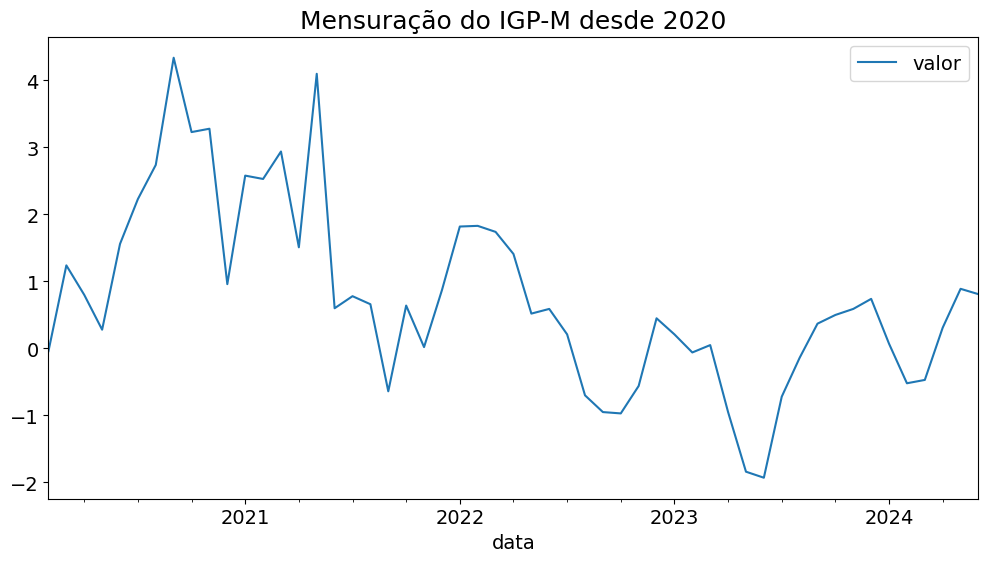

In [8]:
igpm = consulta_bc(189)
igpm = igpm[igpm.index > "2020-01-01"]

fig, ax = plt.subplots(1,1, figsize=(12,6))

igpm.plot(ax = ax, title="Mensuração do IGP-M desde 2020");

#### Taxa Selic

- Descrição:

A Selic é a taxa básica de juros da economia brasileira, definida pelo Banco Central do Brasil. Ela influencia todas as outras taxas de juros no mercado.

- Utilização:

Bancos utilizam a Selic como referência para definir suas taxas de empréstimos e financiamentos, precificar produtos financeiros e tomar decisões de investimento.

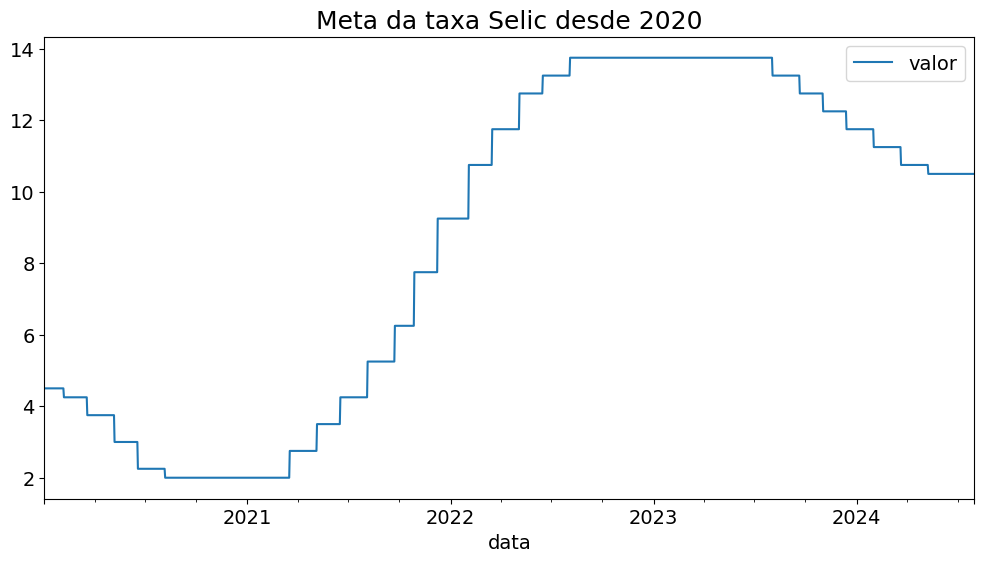

In [9]:
selic_meta = consulta_bc(432)
selic_meta = selic_meta[selic_meta.index > "2020-01-01"]

fig, ax = plt.subplots(1,1, figsize=(12,6))

selic_meta.plot(ax = ax, title="Meta da taxa Selic desde 2020");

#### S&P 500

- Descrição:

O S&P 500 é um índice composto pelas 500 maiores empresas de capital aberto nos Estados Unidos. É amplamente considerado um dos melhores indicadores do desempenho das ações americanas.

- Utilização:

Bancos usam o S&P 500 para avaliar o desempenho do mercado de ações dos EUA, desenvolver produtos financeiros (como ETFs e fundos mútuos indexados ao S&P 500) e como benchmark para avaliar a performance de portfólios.

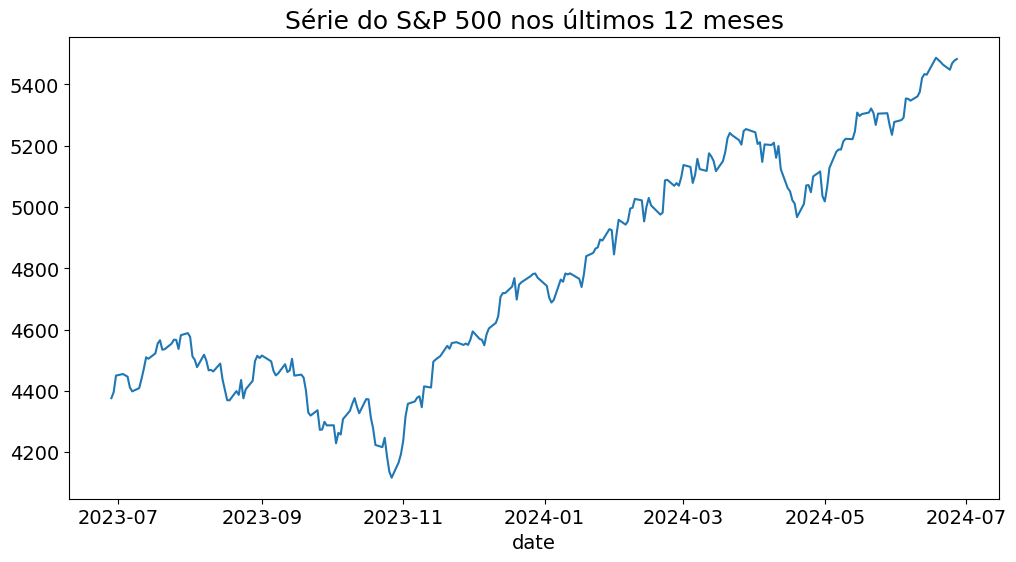

In [10]:
sp500 = yq.Ticker('^GSPC')

sp500_series = sp500.history(period='1y', interval='1d').reset_index()
sp500_series = sp500_series.set_axis(pd.to_datetime(sp500_series.date).dt.date).close

fig, ax = plt.subplots(1,1, figsize=(12,6))

sp500_series.plot(ax = ax, title="Série do S&P 500 nos últimos 12 meses");

#### Dow Jones Industrial Average (DJIA)

- Descrição:

O DJIA é um índice que acompanha 30 grandes empresas públicas dos Estados Unidos. Ele é um dos índices mais antigos e conhecidos.

- Utilização:

Bancos usam o DJIA para obter uma visão rápida do desempenho do mercado de ações dos EUA e para desenvolver produtos financeiros baseados nas empresas que compõem o índice.

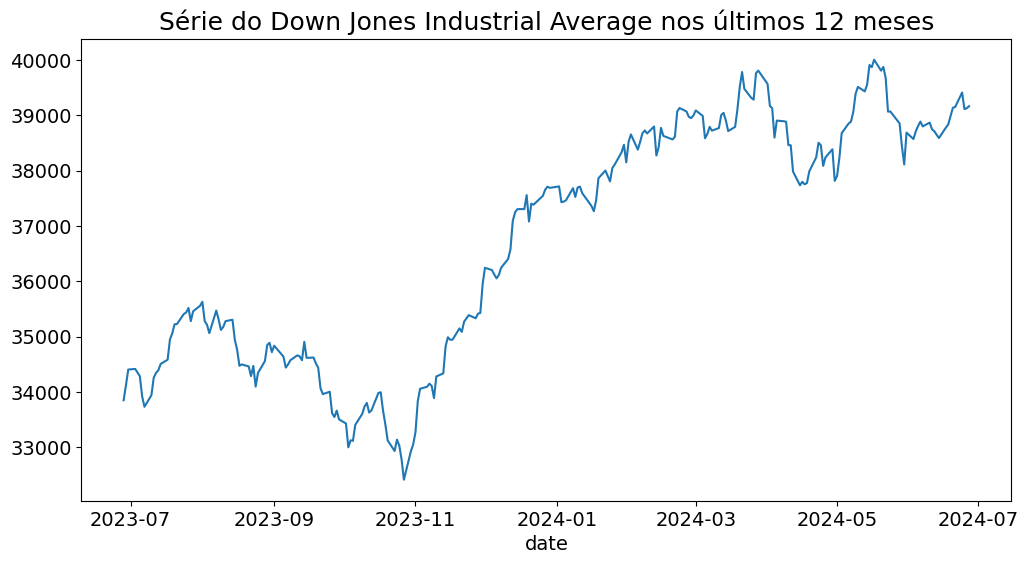

In [11]:
dji = yq.Ticker('^DJI')

dji_series = dji.history(period='1y', interval='1d').reset_index()
dji_series = dji_series.set_axis(pd.to_datetime(dji_series.date).dt.date).close

fig, ax = plt.subplots(1,1, figsize=(12,6))

dji_series.plot(ax = ax, title="Série do Down Jones Industrial Average nos últimos 12 meses");

#### Nasdaq Composite

- Descrição:

O Nasdaq Composite é um índice que inclui mais de 3.000 ações listadas na bolsa Nasdaq, muitas das quais são empresas de tecnologia.

- Utilização:

Bancos utilizam o Nasdaq Composite para avaliar o desempenho do setor de tecnologia e para desenvolver produtos financeiros focados em ações de tecnologia.

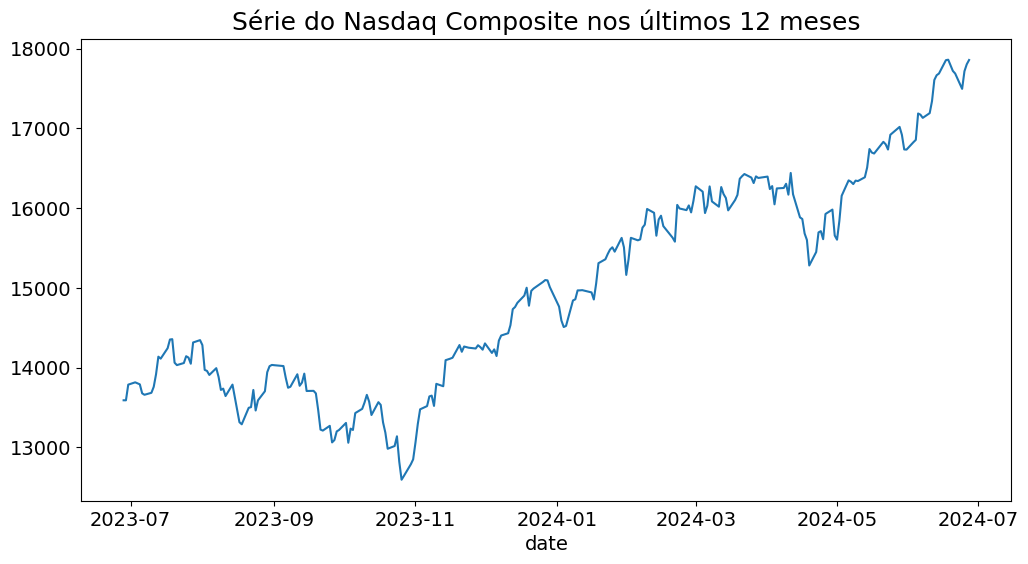

In [12]:
nasdaq = yq.Ticker('^IXIC')

nasdaq_serie = nasdaq.history(period='1y', interval='1d').reset_index()
nasdaq_serie = nasdaq_serie.set_axis(pd.to_datetime(nasdaq_serie.date).dt.date).close

fig, ax = plt.subplots(1,1, figsize=(12,6))

nasdaq_serie.plot(ax = ax, title="Série do Nasdaq Composite nos últimos 12 meses");

#### Libor (London Interbank Offered Rate)

- Descrição:

A Libor é uma taxa de juros média calculada a partir das taxas oferecidas por bancos para empréstimos não garantidos no mercado interbancário de Londres.

- Utilização:

Bancos utilizam a Libor como referência para precificar uma vasta gama de produtos financeiros, como derivativos, empréstimos internacionais e outros contratos de taxa de juros.

In [13]:
aapl = yq.Ticker('^LIBOR')

sp500 = aapl.history(period='1y', interval='1d').adjclose
sp500.plot()

AttributeError: 'DataFrame' object has no attribute 'adjclose'

#### Índice de Commodities

- Descrição:

Índices de commodities, como o CRB Index (Commodity Research Bureau), medem a performance de uma cesta de commodities como petróleo, ouro, café, etc.

- Utilização:

Bancos utilizam índices de commodities para analisar tendências de preços, desenvolver produtos financeiros (como ETFs de commodities) e para gestão de risco em trading de commodities.

In [ ]:
aapl = yq.Ticker('^TRCCRB')

sp500 = aapl.history(period='1y', interval='1d')
sp500#.plot()

#### Utilização dos Índices

- **Benchmarking**: Bancos utilizam índices como benchmarks para medir o desempenho de fundos de investimento e portfólios. Por exemplo, um fundo de ações pode ser comparado ao Ibovespa para avaliar se está superando ou não o mercado.
- **Desenvolvimento de Produtos Financeiros**: Muitos produtos financeiros, como ETFs, fundos mútuos, derivativos e notas estruturadas, são baseados em índices financeiros. Esses produtos permitem aos investidores acessar o desempenho de um índice específico.
- **Análise de Mercado e Risco**: Índices ajudam os bancos a analisar o desempenho do mercado, identificar tendências e avaliar o risco. Por exemplo, um aumento no índice de volatilidade (VIX) pode indicar maior incerteza no mercado.
- **Ajuste de Contratos**: Índices de inflação como o IGP-M são usados para ajustar contratos de longo prazo, como arrendamentos e tarifas, protegendo ambas as partes contra a inflação.
- **Política de Investimento**: Bancos utilizam índices para informar suas estratégias de investimento, alocação de ativos e para tomar decisões sobre quando entrar ou sair de determinados mercados.

## Taxa Nominal vs Real

Associamos Taxa Nominal x Taxa Real quando avaliamos o efeito da inflação sobre investimentos, que reduz o ganho quando a inflação é maior que 0%.

Sabendo que a taxa de juros nominal é um preço, logo, há motivos para deflacioná-lo por um índice de correção de preços como o IPCA, por exemplo, de forma semelhante ao que fazemos quando é necessário “corrigir” o valor de um imóvel que irá à venda. O resultado dessa operação é o que é chamado de taxa de juros real, ou seja, a taxa nominal deflacionada pela taxa de inflação.

### Inflação
Aumento generalizado no valor dos preços de produtos e serviços, que diminui o poder aquisitivo da população.

### Cálculo do Juros Real

Para chegar ao resultado que determina o juros real da economia usamos a [equação de Fisher](https://www.rankia.pt/bolsa/equacao-de-fisher-descubra-o-que-e/#), através da fórmula bem simples a seguir:

\begin{align}
  r = \left(\frac{1+i}{1+\pi}\right) - 1
\end{align}

Onde os termos significam:
- $(r)$ = taxa de juros real
- $(i)$ = taxa de juros nominal
- $(\pi)$ = taxa de inflação

Note que se os dados estiverem expressos em percentual (% a.m., % a.a., etc.), você deve dividir o termo correspondente por 100 na fórmula acima.

### Exemplo de rentabilidade nominal e real

Um gestor de fundos do Santander alocou R\$ 250 milhões em ações e derivativos em janeiro de 2018. Ao desfazer toda a posição inicial do fundo em dezembro de 2023, o saldo final foi de R$ 525 milhões.
Sabendo que a inflação do período foi de aproximadamente 20%, determine a rentabilidade nominal e real.

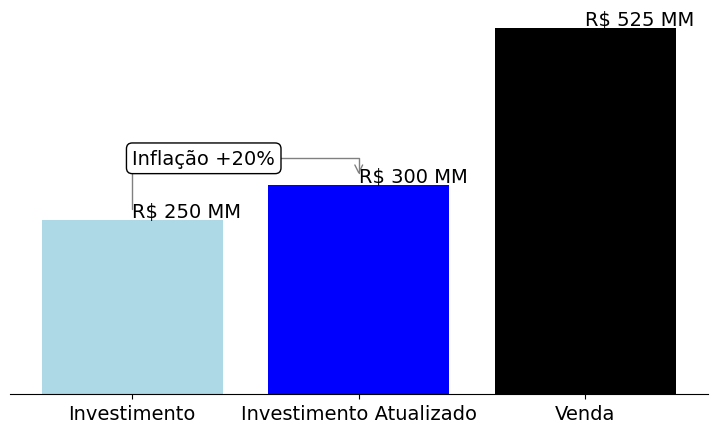

In [14]:
x = ['Investimento', 'Investimento Atualizado', 'Venda']
y = [250, 300, 525]
my_colors = ['lightblue', 'blue', 'black']

fig, ax = plt.subplots(figsize=(9,5))
ax.bar(x,y, color = my_colors)

## add the text above the bars
for idx, value in enumerate(x):
    ax.text(value, y[idx]+3, f'R$ {y[idx]:,.0f} MM')

## add the bar style connection patch, padding the y-coordinates
t = ax.annotate("",
            xy=(x[0], y[0]+5), xycoords='data',
            xytext=(x[-2], y[-2]+5), textcoords='data',
            arrowprops=dict(arrowstyle="<-", color="0.5",
                            shrinkA=5, shrinkB=5,
                            patchA=None, patchB=None,
                            connectionstyle="bar,angle=-180,fraction=0.1",
                            ),
            )

props = dict(boxstyle='round', facecolor="white")

# place a text box in upper left in axes coords
growth = "Inflação +20%"
ax.text(x[0], 300*1.1, growth, bbox=props)

## pretty up the chart by removing axes
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

$$
Rentabilidade Nominal = \frac{Venda}{Investimento}
$$

In [15]:
(y[2]/y[0] - 1) * 100

110.00000000000001

#### Exemplo

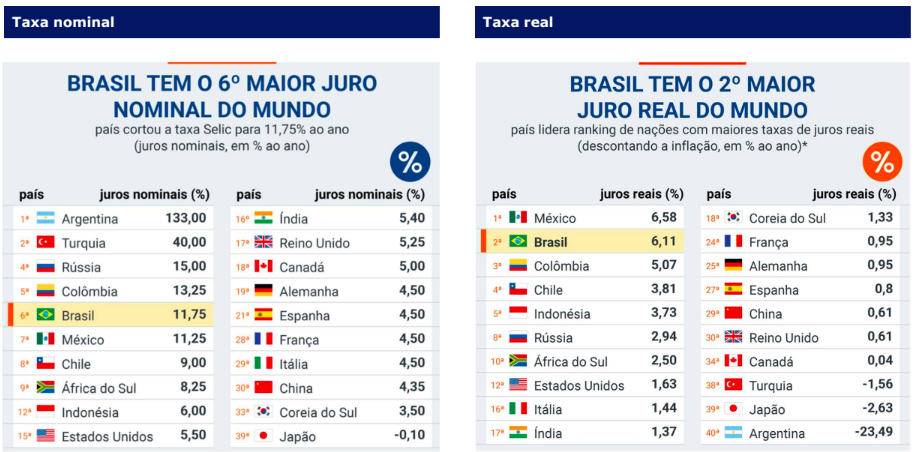

## Combinando taxas e índices

Os produtos financeiros pós-fixados combinam índices de referência, como a taxa CDI ou IPCA, com uma taxa adicional (spread) para oferecer rendimentos variáveis ao investidor. Esses produtos são estruturados para ajustar seus rendimentos conforme as mudanças nas condições econômicas, fornecendo uma proteção contra a inflação ou as flutuações das taxas de juros.

### Estruturação de Produtos Financeiros Pós-Fixados
Produtos pós-fixados são estruturados para garantir que os rendimentos acompanhem um índice de referência, com um spread adicional que recompensa o investidor pelo risco assumido. Vamos explorar alguns exemplos e como calcular suas taxas nominal e real.

#### 1. CDB (Certificado de Depósito Bancário) Pós-Fixado

Estrutura:
- **Índice de Referência**: CDI (Certificado de Depósito Interbancário)
- **Spread Adicional**: Percentual sobre o CDI (exemplo: 100% do CDI)

Cálculo do Rendimento:
- **Taxa Nominal**: Se a taxa CDI anual é 5% e o CDB paga 100% do CDI, a taxa nominal anual do CDB é 5%.
- **Taxa Real**: Para calcular a taxa real, precisamos considerar a inflação. Supondo que a inflação anual (IPCA) seja de 3%:

\begin{align}
  Taxa Real & = \frac{(1 + Taxa Nominal)}{(1 + Infação)} - 1\\
  Taxa Real & = \frac{(1 + 0.05)}{(1 + 0.03)} - 1\\
  Taxa Real & ≈ 1.94\%
\end{align}


#### 2. NTN-B (Nota do Tesouro Nacional série B) Pós-Fixada

Estrutura:
- **Índice de Referência**: IPCA (Índice de Preços ao Consumidor Amplo)
- **Cupom Adicional**: Taxa fixa acima do IPCA (exemplo: IPCA + 4%)

Cálculo do Rendimento:
- **Taxa Nominal**: Supondo que a inflação anual (IPCA) seja de 3%, a taxa nominal anual do título é:

\begin{align}
  Taxa Nominal & = IPCA + Cupom \\
  Taxa Nominal & = 3\% + 4\%  \\
  Taxa Nominal & = 7\%
\end{align}

- **Taxa Real**: Neste caso, a taxa real é simplesmente o cupom adicional, pois já estamos considerando a inflação:

\begin{align}
  Taxa Real & = 4\%
\end{align}

#### 3. LCI/LCA (Letra de Crédito Imobiliário / do Agronegócio)

Estrutura:
- **Índice de Referência**: CDI
- **Spread Adicional**: Percentual sobre o CDI (exemplo: 90% do CDI)

Cálculo do Rendimento:
- **Taxa Nominal**: Se a taxa CDI anual é 5% e o LCI/LCA paga 90% do CDI, a taxa nominal anual do LCI/LCA é:

\begin{align}
  Taxa Nominal & = 90\% + 5\%  \\
  Taxa Nominal & = 4.5\%
\end{align}

- **Taxa Real**: Considerando uma inflação anual (IPCA) de 3%:

\begin{align}
  Taxa Real & = \frac{(1 + 0.045)}{(1 + 0.03)} - 1\\
  Taxa Real & = 1.46\%
\end{align}

#### Conclusão

Os produtos financeiros pós-fixados combinam índices de referência com spreads adicionais para ajustar seus rendimentos conforme as condições econômicas mudam. A taxa nominal é a soma do índice de referência e o spread, enquanto a taxa real ajusta a taxa nominal pela inflação. Bancos utilizam esses produtos para oferecer aos investidores opções que protejam seu capital contra a inflação e flutuações das taxas de juros, proporcionando retornos ajustados ao risco. Compreender a estrutura e o cálculo desses produtos é essencial para tomar decisões de investimento informadas.

## Return on investment (ROI)

O Return on Investment (ROI) é uma medida de desempenho usada para avaliar a eficiência de um investimento, ou comparar a eficiência entre vários investimentos diferentes.

### Utilização
ROI tenta medir diretamente a quantidade de retorno de um determinado investimento em relação ao custo do investimento. Para calculá-lo, o ganho (ou retorno) de um investimento é dividido pelo custo do investimento. O resultado é expresso como uma porcentagem ou uma proporção.

### Breakdown

Cuidados ao se analisar o ROI:
- Tempo necessário para se obter o ROI;
- Inflação para se determinar o ROI real;
- Custo de oportunidade;

### Exemplo

Foi realizado um investimento em ações de R\$ 10 milhões em 01/01/2021. Ao final do ano de 2023 foram vendidas todas as ações compradas, gerando um valor de R\$ 14 milhões. Os custos totais de corretagem e impostos foram de R$ 1 milhão. Calcule o ROI dessa operação.

## Exercício

Você trabalha no funds of funds do Itaú e montou uma operação de R$ 200 milhões para atender um grande cliente. Após 12 meses, você avaliará como foi a performance da alocação realizada.

Seu racional foi dividir a alocação dos recursos em 3 grandes fundos, sendo 50% em um fundo de ações e os outros 50% alocados em dois fundos de renda fixa, um pré-fixado e um pós-fixado. A tabela mensal de rendimentos dos 3 fundos está abaixo:

In [16]:
retornos = np.matrix([[0.0201, 0.0340, -0.0430, -0.0840, 0.0650, 0.0230, -0.0570, 0.0360,	0.033, 0.048, -0.0150, 0.025],
   [0.0065, 0.0065, 0.0065, 0.0065, 0.0065, 0.0065, 0.0065, 0.0065, 0.0065, 0.0065, 0.0065, 0.0065],
   [0.0058, 0.0047, 0.0053, 0.0052,	0.0052,	0.0052,	0.0054,	0.0057,	0.0047,	0.0054,	0.0049,	0.0049]])
retornos_fundos = pd.DataFrame(retornos.T, columns=["Ações","Pré","Pós"])
retornos_fundos.T

,0,1,2,3,4,5,6,7,8,9,10,11
Ações,0.0201,0.0340,-0.0430,-0.0840,0.0650,0.0230,-0.0570,0.0360,0.0330,0.0480,-0.0150,0.0250
Pré,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065
Pós,0.0058,0.0047,0.0053,0.0052,0.0052,0.0052,0.0054,0.0057,0.0047,0.0054,0.0049,0.0049


Foram alocados R\$ 100 milhões no fundo de ações, R\$ 30 milhões no fundo RF pré-fixado e R\$ 70 milhões no fundo RF pós-fixado.

Dois fatores adicionais importante para o cálculo da rentabilidade dos investimentos são a taxa de administração cobrada pelos fundos, além do imposto de renda cobrado de cada um.

|  |Fundo de Ações|Fundo Pré|Fundo Pós|
|---------------------------------------|--------------|---------|---------|
|Taxa de administração (% sobre o total)|0.50%|0.20%|0.10%|
|Imposto de renda (% sobre os juros no período)|15%|25%|15%|

Utilize o 12º mês como base para os cálculos da taxa de administração e imposto de renda.

Para avaliação da performance do fundo, calcule (por fundo e consolidado / no período e mensal):
- Rendimento nominal;
- Rendimento real;
- ROI nominal;
- ROI real;

A inflação no período está na série abaixo:

In [17]:
inflacao = pd.Series([0.0029,	0.0032,	0.0009,	0.0022,	0.0040,	0.0126,	0.0033,	-0.0009,	0.0048,	0.0045,	-0.0021,	0.0015], name="Inflação")

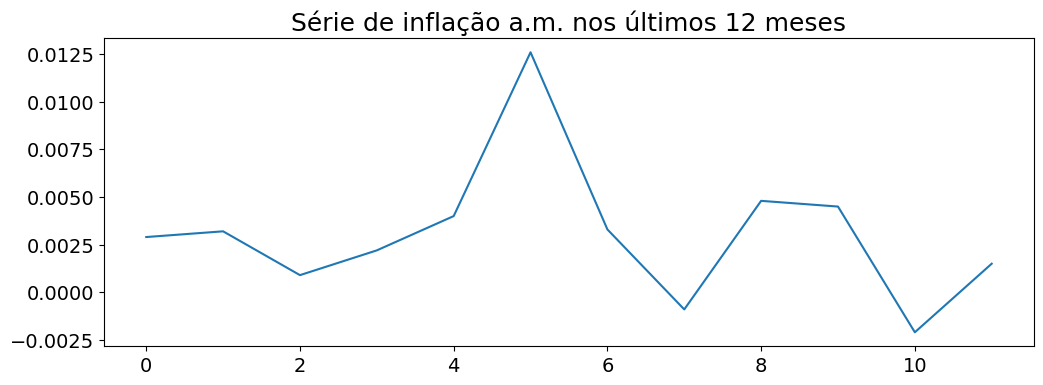

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12,4))

inflacao.plot(ax = ax, title="Série de inflação a.m. nos últimos 12 meses");

#### Pergunta para Discussão
Avaliando a rentabilidade dos fundos, como você avalia o resultado após 12 meses?

### Resolução

In [19]:
def calc_acumular(x):
    global acumulado
    acumulado = (1 + acumulado) * (1 + x.iloc[1]) - 1
    return acumulado

calc_taxa_real = lambda taxa1, taxa2 : (1 + taxa1) / (1 + taxa2) - 1

In [20]:
investimento_acoes = 100e6
investimento_pre = 50e6
investimento_pos = 50e6

taxas_adm = [.005, .002, .001]
irs = [.15, .25, .15]

In [21]:
reantabilidade_fundos = retornos_fundos.copy()
reantabilidade_fundos["Inflação"] = inflacao

#### 1. Calcular inflação acumulada

In [22]:
acumulado = reantabilidade_fundos['Inflação'].iloc[0]
reantabilidade_fundos["Inflação Acumulada"] = reantabilidade_fundos['Inflação'].rolling(window=2).apply(calc_acumular)
reantabilidade_fundos["Inflação Acumulada"].iloc[0] = reantabilidade_fundos['Inflação'].iloc[0]

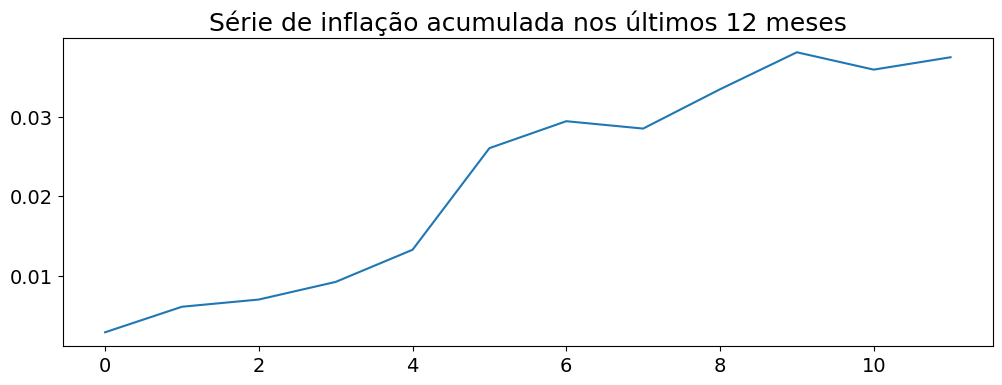

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12,4))

reantabilidade_fundos["Inflação Acumulada"].plot(ax = ax, title="Série de inflação acumulada nos últimos 12 meses");

#### 2. Calcular o retorno do fundo de ações

##### 2.1. - Calcular a rentabilidade acumulada nominal

In [24]:
acumulado = reantabilidade_fundos['Ações'].iloc[0]
reantabilidade_fundos["Ações Acumulada Nominal"] = reantabilidade_fundos['Ações'].rolling(window=2).apply(calc_acumular)
reantabilidade_fundos["Ações Acumulada Nominal"].iloc[0] = reantabilidade_fundos['Ações'].iloc[0]

##### 2.2 - Calcular rentabilidade acumulada real

In [25]:
reantabilidade_fundos["Ações Acumulada Real"] = calc_taxa_real(reantabilidade_fundos["Ações Acumulada Nominal"],
                                                                reantabilidade_fundos["Inflação Acumulada"])

##### 2.3 - Calcular o saldo financeiro mensal

In [26]:
reantabilidade_fundos["Ações Saldo Acumulado"] = investimento_acoes * (1 + reantabilidade_fundos["Ações Acumulada Nominal"])

##### 2.4 - Calcular Retornos


In [27]:
rendimento_nominal_am = reantabilidade_fundos["Ações Acumulada Nominal"].iloc[-1] * 100
rendimento_real_am = reantabilidade_fundos["Ações Acumulada Real"].iloc[-1] * 100
print(f'A taxa de rendimentos nominal ao mês foi de {rendimento_nominal_am:,.2f}% e de rendimento real ao mês foi de {rendimento_real_am:,.2f}%')

A taxa de rendimentos nominal ao mês foi de 7.57% e de rendimento real ao mês foi de 3.69%


In [28]:
saldo_final_acoes = reantabilidade_fundos["Ações Saldo Acumulado"].iloc[-1]
custo_adm_acoes = taxas_adm[0] * saldo_final_acoes
juros_periodo_acoes = saldo_final_acoes - investimento_acoes
custo_ir_acoes = irs[0] * (juros_periodo_acoes - custo_adm_acoes)
print(f'''Com uma taxa de adminstração de {100 * taxas_adm[0]:,.2f}%, tivemos um custo de R$ {custo_adm_acoes:,.2f}
          e o imposto de renda de {100 * irs[0]:,.2f}, tivemos um custo de R$ {custo_ir_acoes:,.2f}''')

Com uma taxa de adminstração de 0.50%, tivemos um custo de R$ 537,847.42
          e o imposto de renda de 15.00, tivemos um custo de R$ 1,054,745.56


In [29]:
roi_nominal = (juros_periodo_acoes - custo_adm_acoes - custo_ir_acoes) / investimento_acoes
roi_real = calc_taxa_real(roi_nominal, reantabilidade_fundos["Inflação Acumulada"].iloc[-1])
print(f'Sendo assim, o ROI nominal no período foi de {100*roi_nominal:,.2f}% e o ROI real foi de {100*roi_real:,.2f}%')

Sendo assim, o ROI nominal no período foi de 5.98% e o ROI real foi de 2.15%


##### Visualizar séries

In [30]:
reantabilidade_fundos

,Ações,Pré,Pós,Inflação,Inflação Acumulada,Ações Acumulada Nominal,Ações Acumulada Real,Ações Saldo Acumulado
0,0.0201,0.0065,0.0058,0.0029,0.002900,0.020100,0.017150,1.020100e+08
1,0.0340,0.0065,0.0047,0.0032,0.006109,0.054783,0.048379,1.054783e+08
2,-0.0430,0.0065,0.0053,0.0009,0.007015,0.009428,0.002396,1.009428e+08
3,-0.0840,0.0065,0.0052,0.0022,0.009230,-0.075364,-0.083821,9.246358e+07
4,0.0650,0.0065,0.0052,0.0040,0.013267,-0.015263,-0.028156,9.847371e+07
5,0.0230,0.0065,0.0052,0.0126,0.026034,0.007386,-0.018175,1.007386e+08
6,-0.0570,0.0065,0.0054,0.0033,0.029420,-0.050035,-0.077184,9.499651e+07
7,0.0360,0.0065,0.0057,-0.0009,0.028494,-0.015836,-0.043102,9.841638e+07
8,0.0330,0.0065,0.0047,0.0048,0.033431,0.016641,-0.016246,1.016641e+08
9,0.0480,0.0065,0.0054,0.0045,0.038081,0.065440,0.026355,1.065440e+08


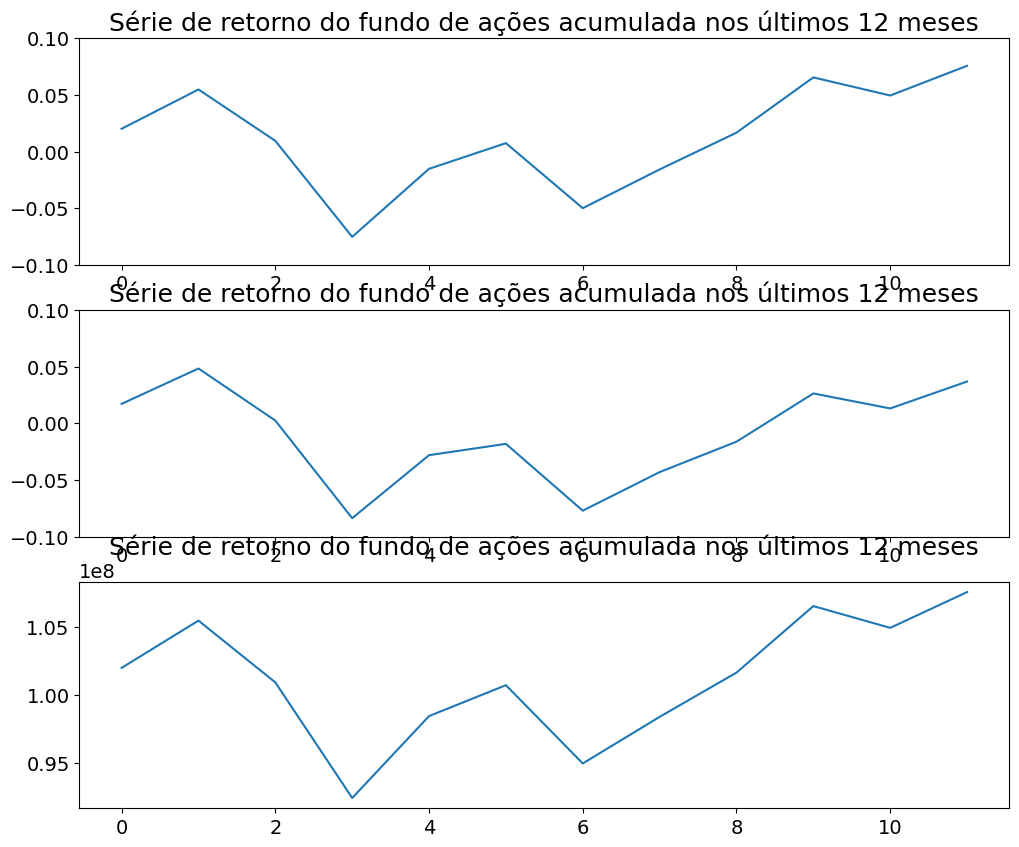

In [31]:
fig, axs = plt.subplots(3,1, figsize=(12,10))
reantabilidade_fundos["Ações Acumulada Nominal"].plot(ax = axs[0], ylim=(-.1,.1), title="Série de retorno do fundo de ações acumulada nos últimos 12 meses");
reantabilidade_fundos["Ações Acumulada Real"].plot(ax = axs[1], ylim=(-.1,.1), title="Série de retorno do fundo de ações acumulada nos últimos 12 meses");
reantabilidade_fundos["Ações Saldo Acumulado"].plot(ax = axs[2], title="Série de retorno do fundo de ações acumulada nos últimos 12 meses");

#### 3. Calcular o retorno do fundo pré

##### 3.1. - Calcular a rentabilidade acumulada nominal

In [53]:
acumulado = reantabilidade_fundos['Pré'].iloc[0]
reantabilidade_fundos["Pré Acumulada Nominal"] = reantabilidade_fundos['Pré'].rolling(window=2).apply(calc_acumular)
reantabilidade_fundos["Pré Acumulada Nominal"].iloc[0] = reantabilidade_fundos['Pré'].iloc[0]

##### 3.2 - Calcular rentabilidade acumulada real

In [54]:
reantabilidade_fundos["Pré Acumulada Real"] = calc_taxa_real(reantabilidade_fundos["Pré Acumulada Nominal"],
                                                                reantabilidade_fundos["Inflação Acumulada"])

##### 3.3 - Calcular o saldo financeiro mensal

In [55]:
reantabilidade_fundos["Pré Saldo Acumulado"] = investimento_pre * (1 + reantabilidade_fundos["Pré Acumulada Nominal"])

##### 3.4 - Calcular Retornos


In [56]:
rendimento_nominal_am = reantabilidade_fundos["Pré Acumulada Nominal"].iloc[-1] * 100
rendimento_real_am = reantabilidade_fundos["Pré Acumulada Real"].iloc[-1] * 100
print(f'A taxa de rendimentos nominal ao mês foi de {rendimento_nominal_am:,.2f}% e de rendimento real ao mês foi de {rendimento_real_am:,.2f}%')

A taxa de rendimentos nominal ao mês foi de 8.08% e de rendimento real ao mês foi de 4.18%


In [57]:
saldo_final_pre = reantabilidade_fundos["Pré Saldo Acumulado"].iloc[-1]
custo_adm_pre = taxas_adm[1] * saldo_final_pre
juros_periodo_pre = saldo_final_pre - investimento_pre
custo_ir_pre = irs[0] * (juros_periodo_pre - custo_adm_pre)
print(f'''Com uma taxa de adminstração de {100 * taxas_adm[1]:,.2f}%, tivemos um custo de R$ {custo_adm_pre:,.2f}
          e o imposto de renda de {100 * irs[1]:,.2f}, tivemos um custo de R$ {custo_ir_pre:,.2f}''')

Com uma taxa de adminstração de 0.20%, tivemos um custo de R$ 108,084.98
          e o imposto de renda de 25.00, tivemos um custo de R$ 590,160.83


In [58]:
roi_nominal = (juros_periodo_pre - custo_adm_pre - custo_ir_pre) / investimento_pre
roi_real = calc_taxa_real(roi_nominal, reantabilidade_fundos["Inflação Acumulada"].iloc[-1])
print(f'Sendo assim, o ROI nominal no período foi de {100*roi_nominal:,.2f}% e o ROI real foi de {100*roi_real:,.2f}%')

Sendo assim, o ROI nominal no período foi de 6.69% e o ROI real foi de 2.84%


##### Visualizar séries

In [59]:
reantabilidade_fundos

,Ações,Pré,Pós,Inflação,Inflação Acumulada,Ações Acumulada Nominal,Ações Acumulada Real,Ações Saldo Acumulado,Pré Acumulada Nominal,Pré Acumulada Real,Pré Saldo Acumulado,Pós Acumulada Nominal,Pós Acumulada Real,Pós Saldo Acumulado,Consolidado Nominal,Consolidado Real,Consolidado Saldo
0,0.0201,0.0065,0.0058,0.0029,0.002900,0.020100,0.017150,1.020100e+08,0.006500,0.003590,5.032500e+07,0.005800,0.002892,1.005800e+08,0.032400,0.023631,3.032400e+08
1,0.0340,0.0065,0.0047,0.0032,0.006109,0.054783,0.048379,1.054783e+08,0.013042,0.006891,5.065211e+07,0.010527,0.004391,1.010527e+08,0.078353,0.059661,3.078353e+08
2,-0.0430,0.0065,0.0053,0.0009,0.007015,0.009428,0.002396,1.009428e+08,0.019627,0.012524,5.098135e+07,0.015883,0.008807,1.015883e+08,0.044938,0.023727,3.044938e+08
3,-0.0840,0.0065,0.0052,0.0022,0.009230,-0.075364,-0.083821,9.246358e+07,0.026255,0.016869,5.131273e+07,0.021166,0.011826,1.021166e+08,-0.027944,-0.055126,2.972056e+08
4,0.0650,0.0065,0.0052,0.0040,0.013267,-0.015263,-0.028156,9.847371e+07,0.032925,0.019401,5.164626e+07,0.026476,0.013036,1.026476e+08,0.044138,0.004280,3.044138e+08
5,0.0230,0.0065,0.0052,0.0126,0.026034,0.007386,-0.018175,1.007386e+08,0.039639,0.013260,5.198196e+07,0.031813,0.005632,1.031813e+08,0.078839,0.000717,3.078839e+08
6,-0.0570,0.0065,0.0054,0.0033,0.029420,-0.050035,-0.077184,9.499651e+07,0.046397,0.016492,5.231985e+07,0.037385,0.007737,1.037385e+08,0.033747,-0.052956,3.033747e+08
7,0.0360,0.0065,0.0057,-0.0009,0.028494,-0.015836,-0.043102,9.841638e+07,0.053199,0.024020,5.265993e+07,0.043298,0.014394,1.043298e+08,0.080661,-0.004687,3.080661e+08
8,0.0330,0.0065,0.0047,0.0048,0.033431,0.016641,-0.016246,1.016641e+08,0.060044,0.025753,5.300221e+07,0.048202,0.014293,1.048202e+08,0.124887,0.023800,3.124887e+08
9,0.0480,0.0065,0.0054,0.0045,0.038081,0.065440,0.026355,1.065440e+08,0.066935,0.027795,5.334673e+07,0.053862,0.015202,1.053862e+08,0.186237,0.069353,3.186237e+08


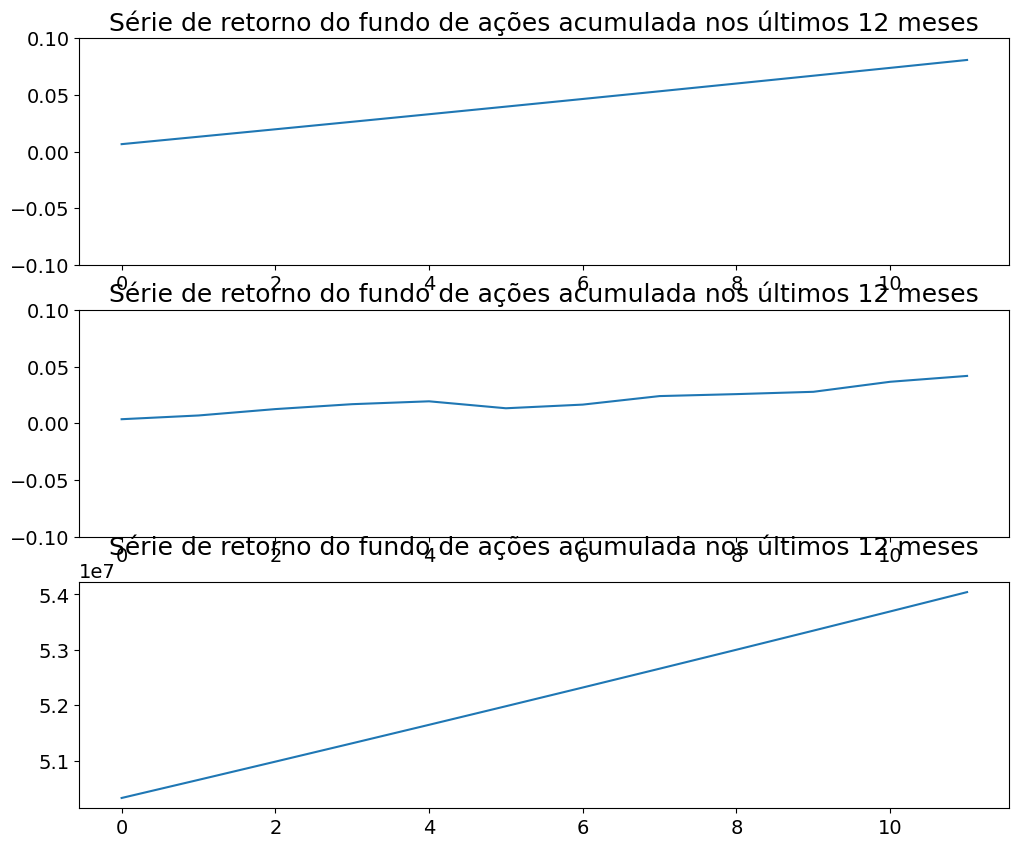

In [60]:
fig, axs = plt.subplots(3,1, figsize=(12,10))
reantabilidade_fundos["Pré Acumulada Nominal"].plot(ax = axs[0], ylim=(-.1,.1), title="Série de retorno do fundo de ações acumulada nos últimos 12 meses");
reantabilidade_fundos["Pré Acumulada Real"].plot(ax = axs[1], ylim=(-.1,.1), title="Série de retorno do fundo de ações acumulada nos últimos 12 meses");
reantabilidade_fundos["Pré Saldo Acumulado"].plot(ax = axs[2], title="Série de retorno do fundo de ações acumulada nos últimos 12 meses");

#### 4. Calcular o retorno do fundo pós-fixado

##### 4.1. - Calcular a rentabilidade acumulada nominal

In [61]:
acumulado = reantabilidade_fundos['Pós'].iloc[0]
reantabilidade_fundos["Pós Acumulada Nominal"] = reantabilidade_fundos['Pós'].rolling(window=2).apply(calc_acumular)
reantabilidade_fundos["Pós Acumulada Nominal"].iloc[0] = reantabilidade_fundos['Pós'].iloc[0]

##### 4.2 - Calcular rentabilidade acumulada real

In [62]:
reantabilidade_fundos["Pós Acumulada Real"] = calc_taxa_real(reantabilidade_fundos["Pós Acumulada Nominal"],
                                                                reantabilidade_fundos["Inflação Acumulada"])

##### 4.3 - Calcular o saldo financeiro mensal

In [63]:
reantabilidade_fundos["Pós Saldo Acumulado"] = investimento_pos * (1 + reantabilidade_fundos["Pós Acumulada Nominal"])

##### 4.4 - Calcular Retornos


In [64]:
rendimento_nominal_am = reantabilidade_fundos["Pós Acumulada Nominal"].iloc[-1] * 100
rendimento_real_am = reantabilidade_fundos["Pós Acumulada Real"].iloc[-1] * 100
print(f'A taxa de rendimentos nominal ao mês foi de {rendimento_nominal_am:,.2f}% e de rendimento real ao mês foi de {rendimento_real_am:,.2f}%')

A taxa de rendimentos nominal ao mês foi de 6.42% e de rendimento real ao mês foi de 2.58%


In [65]:
saldo_final_pos = reantabilidade_fundos["Pós Saldo Acumulado"].iloc[-1]
custo_adm_pos = taxas_adm[2] * saldo_final_pos
juros_periodo_pos = saldo_final_pos - investimento_pos
custo_ir_pos = irs[2] * (juros_periodo_pos - custo_adm_pos)
print(f'''Com uma taxa de adminstração de {100 * taxas_adm[2]:,.2f}%, tivemos um custo de R$ {custo_adm_pos:,.2f}
          e o imposto de renda de {100 * irs[2]:,.2f}, tivemos um custo de R$ {custo_ir_pos:,.2f}''')

Com uma taxa de adminstração de 0.10%, tivemos um custo de R$ 53,210.76
          e o imposto de renda de 15.00, tivemos um custo de R$ 473,632.48


In [66]:
roi_nominal = (juros_periodo_pos - custo_adm_pos - custo_ir_pos) / investimento_pos
roi_real = calc_taxa_real(roi_nominal, reantabilidade_fundos["Inflação Acumulada"].iloc[-1])
print(f'Sendo assim, o ROI nominal no período foi de {100*roi_nominal:,.2f}% e o ROI real foi de {100*roi_real:,.2f}%')

Sendo assim, o ROI nominal no período foi de 5.37% e o ROI real foi de 1.56%


##### Visualizar séries

In [67]:
reantabilidade_fundos

,Ações,Pré,Pós,Inflação,Inflação Acumulada,Ações Acumulada Nominal,Ações Acumulada Real,Ações Saldo Acumulado,Pré Acumulada Nominal,Pré Acumulada Real,Pré Saldo Acumulado,Pós Acumulada Nominal,Pós Acumulada Real,Pós Saldo Acumulado,Consolidado Nominal,Consolidado Real,Consolidado Saldo
0,0.0201,0.0065,0.0058,0.0029,0.002900,0.020100,0.017150,1.020100e+08,0.006500,0.003590,5.032500e+07,0.005800,0.002892,5.029000e+07,0.032400,0.023631,3.032400e+08
1,0.0340,0.0065,0.0047,0.0032,0.006109,0.054783,0.048379,1.054783e+08,0.013042,0.006891,5.065211e+07,0.010527,0.004391,5.052636e+07,0.078353,0.059661,3.078353e+08
2,-0.0430,0.0065,0.0053,0.0009,0.007015,0.009428,0.002396,1.009428e+08,0.019627,0.012524,5.098135e+07,0.015883,0.008807,5.079415e+07,0.044938,0.023727,3.044938e+08
3,-0.0840,0.0065,0.0052,0.0022,0.009230,-0.075364,-0.083821,9.246358e+07,0.026255,0.016869,5.131273e+07,0.021166,0.011826,5.105828e+07,-0.027944,-0.055126,2.972056e+08
4,0.0650,0.0065,0.0052,0.0040,0.013267,-0.015263,-0.028156,9.847371e+07,0.032925,0.019401,5.164626e+07,0.026476,0.013036,5.132379e+07,0.044138,0.004280,3.044138e+08
5,0.0230,0.0065,0.0052,0.0126,0.026034,0.007386,-0.018175,1.007386e+08,0.039639,0.013260,5.198196e+07,0.031813,0.005632,5.159067e+07,0.078839,0.000717,3.078839e+08
6,-0.0570,0.0065,0.0054,0.0033,0.029420,-0.050035,-0.077184,9.499651e+07,0.046397,0.016492,5.231985e+07,0.037385,0.007737,5.186926e+07,0.033747,-0.052956,3.033747e+08
7,0.0360,0.0065,0.0057,-0.0009,0.028494,-0.015836,-0.043102,9.841638e+07,0.053199,0.024020,5.265993e+07,0.043298,0.014394,5.216491e+07,0.080661,-0.004687,3.080661e+08
8,0.0330,0.0065,0.0047,0.0048,0.033431,0.016641,-0.016246,1.016641e+08,0.060044,0.025753,5.300221e+07,0.048202,0.014293,5.241009e+07,0.124887,0.023800,3.124887e+08
9,0.0480,0.0065,0.0054,0.0045,0.038081,0.065440,0.026355,1.065440e+08,0.066935,0.027795,5.334673e+07,0.053862,0.015202,5.269310e+07,0.186237,0.069353,3.186237e+08


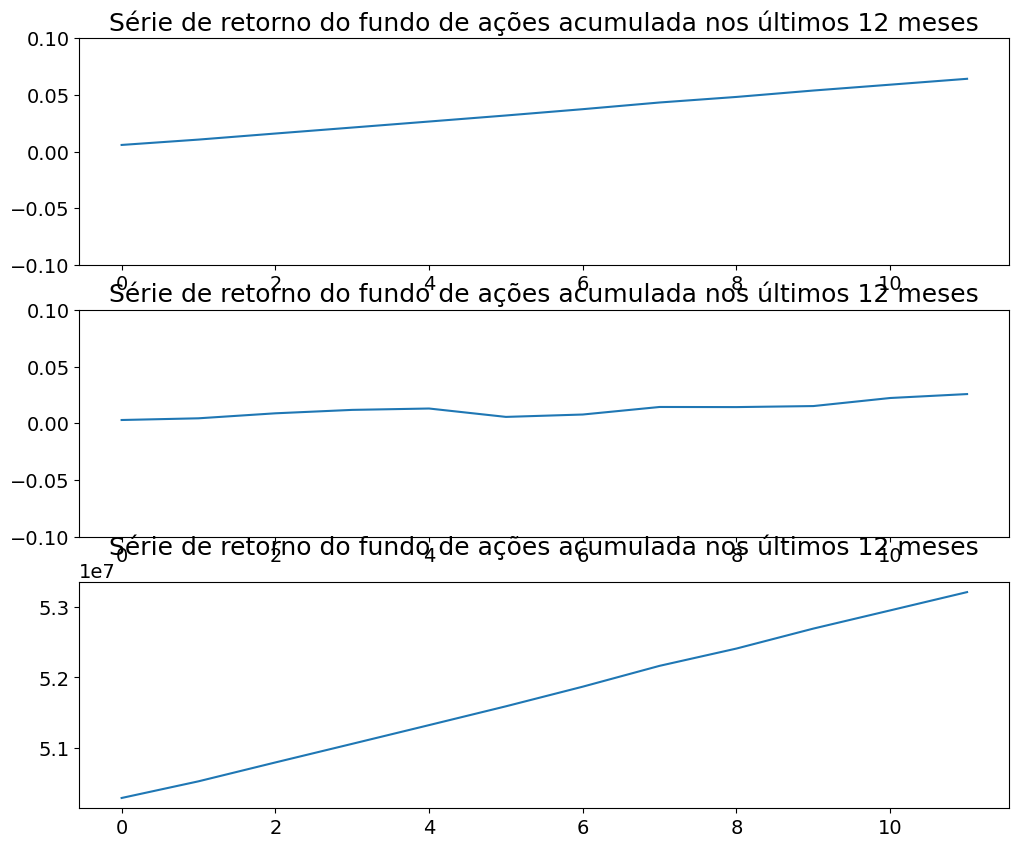

In [68]:
fig, axs = plt.subplots(3,1, figsize=(12,10))
reantabilidade_fundos["Pós Acumulada Nominal"].plot(ax = axs[0], ylim=(-.1,.1), title="Série de retorno do fundo de ações acumulada nos últimos 12 meses");
reantabilidade_fundos["Pós Acumulada Real"].plot(ax = axs[1], ylim=(-.1,.1), title="Série de retorno do fundo de ações acumulada nos últimos 12 meses");
reantabilidade_fundos["Pós Saldo Acumulado"].plot(ax = axs[2], title="Série de retorno do fundo de ações acumulada nos últimos 12 meses");

#### 5. Calcular o retorno da carteira

In [69]:
reantabilidade_fundos["Consolidado Nominal"] = reantabilidade_fundos[["Ações Acumulada Nominal","Pré Acumulada Nominal","Pós Acumulada Nominal"]].sum(axis=1)
reantabilidade_fundos["Consolidado Real"] = reantabilidade_fundos[["Ações Acumulada Real","Pré Acumulada Real","Pós Acumulada Real"]].sum(axis=1)
reantabilidade_fundos["Consolidado Saldo"] = reantabilidade_fundos[["Ações Saldo Acumulado","Pré Saldo Acumulado","Pós Saldo Acumulado"]].sum(axis=1)

In [70]:
reantabilidade_fundos

,Ações,Pré,Pós,Inflação,Inflação Acumulada,Ações Acumulada Nominal,Ações Acumulada Real,Ações Saldo Acumulado,Pré Acumulada Nominal,Pré Acumulada Real,Pré Saldo Acumulado,Pós Acumulada Nominal,Pós Acumulada Real,Pós Saldo Acumulado,Consolidado Nominal,Consolidado Real,Consolidado Saldo
0,0.0201,0.0065,0.0058,0.0029,0.002900,0.020100,0.017150,1.020100e+08,0.006500,0.003590,5.032500e+07,0.005800,0.002892,5.029000e+07,0.032400,0.023631,2.026250e+08
1,0.0340,0.0065,0.0047,0.0032,0.006109,0.054783,0.048379,1.054783e+08,0.013042,0.006891,5.065211e+07,0.010527,0.004391,5.052636e+07,0.078353,0.059661,2.066568e+08
2,-0.0430,0.0065,0.0053,0.0009,0.007015,0.009428,0.002396,1.009428e+08,0.019627,0.012524,5.098135e+07,0.015883,0.008807,5.079415e+07,0.044938,0.023727,2.027183e+08
3,-0.0840,0.0065,0.0052,0.0022,0.009230,-0.075364,-0.083821,9.246358e+07,0.026255,0.016869,5.131273e+07,0.021166,0.011826,5.105828e+07,-0.027944,-0.055126,1.948346e+08
4,0.0650,0.0065,0.0052,0.0040,0.013267,-0.015263,-0.028156,9.847371e+07,0.032925,0.019401,5.164626e+07,0.026476,0.013036,5.132379e+07,0.044138,0.004280,2.014438e+08
5,0.0230,0.0065,0.0052,0.0126,0.026034,0.007386,-0.018175,1.007386e+08,0.039639,0.013260,5.198196e+07,0.031813,0.005632,5.159067e+07,0.078839,0.000717,2.043112e+08
6,-0.0570,0.0065,0.0054,0.0033,0.029420,-0.050035,-0.077184,9.499651e+07,0.046397,0.016492,5.231985e+07,0.037385,0.007737,5.186926e+07,0.033747,-0.052956,1.991856e+08
7,0.0360,0.0065,0.0057,-0.0009,0.028494,-0.015836,-0.043102,9.841638e+07,0.053199,0.024020,5.265993e+07,0.043298,0.014394,5.216491e+07,0.080661,-0.004687,2.032412e+08
8,0.0330,0.0065,0.0047,0.0048,0.033431,0.016641,-0.016246,1.016641e+08,0.060044,0.025753,5.300221e+07,0.048202,0.014293,5.241009e+07,0.124887,0.023800,2.070764e+08
9,0.0480,0.0065,0.0054,0.0045,0.038081,0.065440,0.026355,1.065440e+08,0.066935,0.027795,5.334673e+07,0.053862,0.015202,5.269310e+07,0.186237,0.069353,2.125838e+08


In [71]:
rendimento_nominal_am = reantabilidade_fundos["Consolidado Nominal"].iloc[-1] * 100
rendimento_real_am = reantabilidade_fundos["Consolidado Real"].iloc[-1] * 100
print(f'A taxa de rendimentos nominal ao mês foi de {rendimento_nominal_am:,.2f}% e de rendimento real ao mês foi de {rendimento_real_am:,.2f}%')

A taxa de rendimentos nominal ao mês foi de 22.08% e de rendimento real ao mês foi de 10.45%


In [72]:
custo_adm_carteira = custo_adm_acoes + custo_adm_pre + custo_adm_pos
juros_carteira = juros_periodo_acoes + juros_periodo_pre + juros_periodo_pos
custo_ir_carteira = custo_ir_acoes + custo_ir_pre + custo_ir_pos
print(f'''Consolidando toda a carteira, tivemos um custo administrativo de R$ {custo_adm_carteira:,.2f} e um custo IR de R$ {custo_ir_carteira:,.2f}''')

Consolidando toda a carteira, tivemos um custo administrativo de R$ 699,143.16 e um custo IR de R$ 2,118,538.87


In [73]:
roi_nominal = (juros_carteira - custo_adm_carteira - custo_ir_carteira) / (investimento_acoes + investimento_pre + investimento_pos)
roi_real = calc_taxa_real(roi_nominal, reantabilidade_fundos["Inflação Acumulada"].iloc[-1])
print(f'Sendo assim, o ROI nominal no período foi de {100*roi_nominal:,.2f}% e o ROI real foi de {100*roi_real:,.2f}%')

Sendo assim, o ROI nominal no período foi de 6.00% e o ROI real foi de 2.18%


## Exercícios

1. **Juros compostos**

Uma empressa do segmento Ultra realizou um investimento há (exatos) 3 anos em um CDB do Itaú. O valor inicial investido foi de R\$ 2,00 bilhões. Hoje, dia do vencimento do CDB, foram resgatados R\$ 2,64 bilhões.

Calcule os juros do período, a taxa de juros anuais e mensais.

Existe a possibilidade de renovar o CDB e deixa-lo por mais de 6 meses, ou mais 3 anos. QUais seriam os saldos finais nesses casos, mantendo a rentabilidade dos últimos 3 anos?

2. **Juros compostos + inflação**

A Avenue ofereceu dois investimentos para você:

1. Debêntures des uma empresa brasileira com vencimento de 2 anos, onde investindo R\$ 100.000,00 hoje, você resgata R\$ 118.000,00 no vencimento;
2. Debentures de empresa americana com vencimento de 2 anos, onde investindo US\$ 20.000,00 hoje, você resgata US\$ 22.800,00 no vencimento;

Qual investimento fornecerá os maiores juros reais no período?

*Dados*: a inflação projetada para o BR em 2 anos é 9% no período e a inflação projetada para USA em 2 anos é de 5% no período.

https://www.rankia.pt/bolsa/equacao-de-fisher-descubra-o-que-e/#
https://blogdoibre.fgv.br/posts/juro-real-ex-ante-caindo-ou-subindo
https://fortietwo.com/blog/2021-02-24-calculo-do-juro-real/index.html
https://www.suno.com.br/artigos/taxa-de-juros-nominal/
https://conteudos.xpi.com.br/aprenda-a-investir/relatorios/juros-real/
https://x.com/jcaetanoleite/status/1799095537385472107
https://interinvest.inter.co/analise/macro-research/o-impacto-cambial-na-inflacao
https://www.linkedin.com/posts/guilherme-almeida-economista_gr%C3%A1fico-do-dia-r-taxa-de-juros-reais-ex-ante-activity-7110598479629971458-MePy/?originalSubdomain=pt
https://www.bb.com.br/pbb/pagina-inicial/empresas/produtos-e-servicos/comercio-exterior/entenda-a-transicao-da-taxa-libor#/
https://uk.finance.yahoo.com/news/libor.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAGfIpDlK0Lkj9wrNo-kMMiDuBNczmPaxpSa3_GGWZJ_a9uSAZsRvrH3MV6tUwiythu-HiTBlDVZ88ADdT9gKWpZnzpVkggieCGxwaGhfNPE2DaWslKdfxHoAHZPe3iPqXaEOwJpRPvqxSK8BAqkU1hzHjDdc_kzo3nYKlhITcCPA
https://github.com/harshhacks/quantparadise
https://janelleturing.medium.com/python-for-fixed-income-modeling-yield-curves-and-interest-rate-derivatives-9d9ac8596d19
